In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import datetime

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 7s 0us/step


In [ ]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

array([1], dtype=uint8)

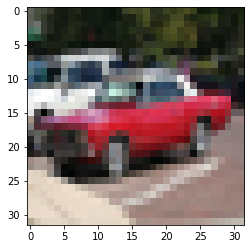

In [ ]:
i = 3001
plt.imshow(X_test[i])
y_test[i]

In [ ]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
X_train_gray = np.sum(X_train / 3, axis = 3, keepdims=True)
X_test_gray = np.sum(X_test / 3, axis = 3, keepdims=True)

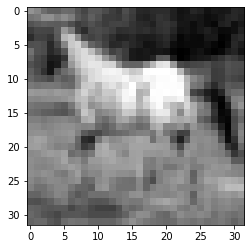

In [ ]:
i = 55
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')

In [ ]:
from tensorflow.keras import layers, models

LeNet = models.Sequential()

LeNet.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32, 32, 1)))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Conv2D(16, (5,5), activation = 'relu'))
LeNet.add(layers.AveragePooling2D())

LeNet.add(layers.Flatten())

LeNet.add(layers.Dense(120, activation='relu'))

LeNet.add(layers.Dense(84, activation='relu'))

LeNet.add(layers.Dense(43, activation='softmax'))

LeNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [ ]:
LeNet.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
history = LeNet.fit(X_train_gray, y_train,
                    batch_size = 500,
                    epochs = 50,)

Epoch 1/50
100/100 [==============================] - 19s 184ms/step - loss: 2.9023 - accuracy: 0.2217
Epoch 2/50
100/100 [==============================] - 19s 189ms/step - loss: 1.7353 - accuracy: 0.3790
Epoch 3/50
100/100 [==============================] - 19s 193ms/step - loss: 1.5982 - accuracy: 0.4350
Epoch 4/50
100/100 [==============================] - 19s 188ms/step - loss: 1.5093 - accuracy: 0.4678
Epoch 5/50
100/100 [==============================] - 19s 187ms/step - loss: 1.4468 - accuracy: 0.4926
Epoch 6/50
100/100 [==============================] - 19s 186ms/step - loss: 1.3792 - accuracy: 0.5173
Epoch 7/50
100/100 [==============================] - 19s 188ms/step - loss: 1.3338 - accuracy: 0.5347
Epoch 8/50
100/100 [==============================] - 19s 191ms/step - loss: 1.2852 - accuracy: 0.5526
Epoch 9/50
100/100 [==============================] - 19s 192ms/step - loss: 1.2537 - accuracy: 0.5653
Epoch 10/50
100/100 [==============================] - 19s 189ms/step - l

In [ ]:
score = LeNet.evaluate(X_test_gray, y_test)
print('Test Accuracy: {}'.format(score[1]))

313/313 [==============================] - 3s 8ms/step - loss: 1.9878 - accuracy: 0.5566
Test Accuracy: 0.5565999746322632


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [ ]:
loss = history.history['loss']
ac = history.history['accuracy']

In [ ]:
ac

[0.22171999514102936,
 0.37902000546455383,
 0.4350000023841858,
 0.4677799940109253,
 0.4925999939441681,
 0.517300009727478,
 0.5347200036048889,
 0.5526000261306763,
 0.5652599930763245,
 0.5819399952888489,
 0.5922600030899048,
 0.6047400236129761,
 0.6188799738883972,
 0.6308199763298035,
 0.6382799744606018,
 0.6477800011634827,
 0.6516600251197815,
 0.659500002861023,
 0.6723799705505371,
 0.6835399866104126,
 0.6860799789428711,
 0.6897799968719482,
 0.6990399956703186,
 0.7079600095748901,
 0.7150800228118896,
 0.7188400030136108,
 0.7249600291252136,
 0.7318400144577026,
 0.7386800050735474,
 0.739300012588501,
 0.7469199895858765,
 0.7550399899482727,
 0.7580999732017517,
 0.7606599926948547,
 0.7690200209617615,
 0.777899980545044,
 0.777239978313446,
 0.7788199782371521,
 0.7857199907302856,
 0.790880024433136,
 0.7964199781417847,
 0.8014600276947021,
 0.8000800013542175,
 0.8048800230026245,
 0.8172199726104736,
 0.8199399709701538,
 0.8170999884605408,
 0.82135999202728

In [ ]:
loss

[2.902315378189087,
 1.735254168510437,
 1.5982229709625244,
 1.5093098878860474,
 1.4468207359313965,
 1.3792463541030884,
 1.333808183670044,
 1.2851601839065552,
 1.2537297010421753,
 1.2069683074951172,
 1.1783583164215088,
 1.1437464952468872,
 1.102813482284546,
 1.0709646940231323,
 1.0499268770217896,
 1.0236341953277588,
 1.0053972005844116,
 0.9825193881988525,
 0.9460811018943787,
 0.9211905598640442,
 0.9111830592155457,
 0.8977881073951721,
 0.8808718919754028,
 0.8524854183197021,
 0.8316164612770081,
 0.8180524706840515,
 0.8016213178634644,
 0.7790429592132568,
 0.7590404152870178,
 0.75372713804245,
 0.7357862591743469,
 0.7178283333778381,
 0.7010185718536377,
 0.6961158514022827,
 0.6724060773849487,
 0.6510350704193115,
 0.6504653096199036,
 0.6421145796775818,
 0.6222361326217651,
 0.609526515007019,
 0.5953899025917053,
 0.5823419690132141,
 0.579689621925354,
 0.5686423778533936,
 0.5388792753219604,
 0.5265293717384338,
 0.531177282333374,
 0.5190505981445312,
 

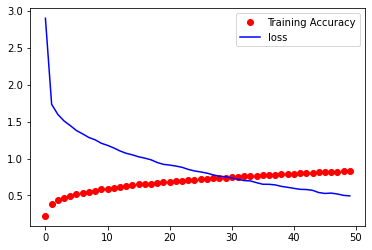

In [ ]:
epochs = range(len(ac))
plt.plot(epochs, ac, 'bo', color = 'r', label='Training Accuracy')
plt.plot(epochs, loss, 'b', color = 'b', label='loss ')
plt.legend()

In [15]:
frutas = ['a', 'b', 'c']
frutas.append('d')
for i in range(2):
  frutas.pop()
print(frutas)

['a', 'b']
